# 레드와인 데이터 분석

In [50]:
import pandas as pd

# 아래처럼 하면 많은 양의 csv 자동화가능 for문
from glob import glob
df_raw = pd.read_csv(glob('./data/wine/*.csv')[0])

data = df_raw

df= df_raw 

# 단건 자료를 가져올땐 아래처럼 할 수도 있음
# pd.read_csv('./zip/winequality-red.csv')

In [51]:
df_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 방법1

tmp = []

for x in df['quality']:
    if x > 6.5:
        tmp.append('good')
    else:
        tmp.append('bad')

df['new_quality'] = tmp

In [134]:
# 방법2

df['new_quality'] = ['good' if x>6.5 else 'bad' for x in df['quality']]

In [136]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [137]:
# 방법3
def function_quality(x):
    if x['quality']>=6.5:
        return 'good'
    else:
        return 'bad'

# df['new_quality'] = df.apply(function_quality, axis=1)

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Length: 1599, dtype: object

In [138]:
## new_quality는 문자열 자료로 라벨인코더를 해야함
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['new_quality']= label.fit_transform(df['new_quality'])

In [140]:
# 0(bad) 1382, 1(good) 217
df['new_quality'].groupby(df['new_quality']).count()

new_quality
0    1382
1     217
Name: new_quality, dtype: int64

## [Linear Regression] (https://www.kaggle.com/egemenuurdalg/linear-regression)
### 와인의 품질을 0~10 사이의 숫자로 예측

In [52]:
# 회귀분석(Linear Regression)
from statsmodels.api import OLS, add_constant       # p-value나 회귀계수를 확인할 수 있음 
from sklearn.linear_model import LinearRegression   # 회귀분석 모델
from sklearn.metrics import mean_squared_error      # 에러값을 mean_squared_error 로 만들어줌
from sklearn.datasets import make_regression        # 회귀분석용 가상 데이터 생성
import numpy as np                                  # 넘파이
import pandas as pd                                 # 판다스
import matplotlib.pyplot as plt                     # 시각화
from sklearn.model_selection import train_test_split, cross_val_score    # 테스트 데이터 나눔
# from tensorflow.keras.models import Sequential    # 이번강의땐 텐서플로우 안함
# from tensorflow.keras.layers import Dense         # 이번강의땐 텐서플로우 안함
from sklearn.preprocessing import normalize         # 정규화
%matplotlib inline                                  # 시각화 매직 명렁어

UsageError: unrecognized arguments: # 시각화 매직 명렁어


In [53]:
# na값 확인 null값 없음
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [54]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [55]:
# x, y 데이터 분리
y=data.quality
X=data.drop(['quality'],axis=1)

# train, test로 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [56]:
# 각각의 훈련데이터(X,y)와 테스트데이터(X,y)간의 행의 갯수가 일치 하는지 확인 필수
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

In [57]:
ols_model=OLS(y_train,X_train)
results=ols_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8056.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        14:07:50   Log-Likelihood:                         -1192.1
No. Observations:                1199   AIC:                                      2406.
Df Residuals:                    1188   BIC:                                      2462.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0032      0.019      0.167      0.868      -0.034       0.041
volatile acidity        -1.0221      0.140     -7.276      0.000      -1.298      -0.746
citric acid             -0.1352      0.173     -0.783      0.434      -0.474       0.204
residual sugar           0.0001      0.014      0.010      0.992      -0.027       0.028
chlorides               -1.7809      0.471     -3.778      0.000      -2.706      -0.856
free sulfur dioxide      0.0052      0.003      2.008      0.045       0.000       0.010
total sulfur dioxide    -0.0037      0.001     -4.364      0.000      -0.005      -0.002
density                  4.2080      0.724      5.809      0.000       2.787       5.629
pH                      -0.4428      0.186     -2.385      0.017      -0.807      -0.079
sulphates                0.7928      0.126      6.295      0.000       0.546       1.040
alcohol                  0.3050      0.020     14.944      0.000       0.265       0.345
==============================================================================
Omnibus:                       26.033   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.079
Skew:                          -0.179   Prob(JB):                     7.29e-10
Kurtosis:                       3.845   Cond. No.                     2.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# p-value가 높은 값(일반적으로 0.05이상)을 갖는 데이터 열에서 제거
# 필수는 아님.
X.drop(['fixed acidity','citric acid','residual sugar'],axis=1,inplace=True)

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [60]:
ols_model=OLS(y_train,X_train)
results=ols_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.110e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        14:07:50   Log-Likelihood:                         -1192.4
No. Observations:                1199   AIC:                                      2401.
Df Residuals:                    1191   BIC:                                      2442.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -0.9593      0.117     -8.200      0.000      -1.189      -0.730
chlorides               -1.8737      0.445     -4.212      0.000      -2.746      -1.001
free sulfur dioxide      0.0056      0.003      2.200      0.028       0.001       0.011
total sulfur dioxide    -0.0039      0.001     -4.815      0.000      -0.005      -0.002
density                  4.0671      0.467      8.706      0.000       3.151       4.984
pH                      -0.3980      0.137     -2.913      0.004      -0.666      -0.130
sulphates                0.7895      0.125      6.294      0.000       0.543       1.036
alcohol                  0.3012      0.020     15.222      0.000       0.262       0.340
==============================================================================
Omnibus:                       26.495   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.808
Skew:                          -0.183   Prob(JB):                     5.06e-10
Kurtosis:                       3.850   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
X_train=add_constant(X_train)
X_test=add_constant(X_test)

ols_model=OLS(y_train,X_train)
results=ols_model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     81.64
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          1.40e-107
Time:                        14:07:50   Log-Likelihood:                -1192.2
No. Observations:                1199   AIC:                             2402.
Df Residuals:                    1190   BIC:                             2448.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5998     12.450      0.691      0.490     -15.826      33.026
volatile acidity        -0.9577      0.117     -8.183      0.000      -1.187      -0.728
chlorides               -1.8862      0.445     -4.236      0.000      -2.760      -1.013
free sulfur dioxide      0.0055      0.003      2.175      0.030       0.001       0.010
total sulfur dioxide    -0.0039      0.001     -4.829      0.000      -0.005      -0.002
density                 -4.4148     12.288     -0.359      0.719     -28.523      19.693
pH                      -0.4222      0.141     -2.993      0.003      -0.699      -0.145
sulphates                0.8023      0.127      6.326      0.000       0.554       1.051
alcohol                  0.2943      0.022     13.283      0.000       0.251       0.338
==============================================================================
Omnibus:                       25.683   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.215
Skew:                          -0.179   Prob(JB):                     1.12e-09
Kurtosis:                       3.835   Cond. No.                     5.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
X_train

,const,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
582,1.0,0.490,0.083,5.0,15.0,1.00000,3.19,0.43,9.2
626,1.0,0.600,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
1030,1.0,0.590,0.091,9.0,14.0,0.99488,3.42,0.55,11.5
620,1.0,0.540,0.076,16.0,112.0,0.99760,3.27,0.61,9.4
490,1.0,0.775,0.078,24.0,56.0,0.99840,3.31,0.67,10.6
...,...,...,...,...,...,...,...,...,...
1130,1.0,0.600,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,1.0,0.635,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,1.0,0.620,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,1.0,0.200,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [63]:
print(results.predict(X_test)[0:5])
print('------------------------------')
print(y_test.head())

803     5.332023
124     5.038873
350     5.616547
682     5.468969
1326    5.759155
dtype: float64
------------------------------
803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64


In [64]:
def rounder(array):
    rounded_array=[]
    for i in array:
        rounded_array.append(int(i))
    return np.array(rounded_array)

In [65]:
sub = (results.predict(X_test) - round(y_test, 0))**2
np.sqrt(np.mean(sub)), np.mean(sub)

(0.6242812218056087, 0.3897270438991036)

In [66]:
ols_pred=results.predict(X_test)
rounded_pred_ols=rounder(ols_pred)

# rmse는 낮을수록 좋음
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(rounded_pred_ols,y_test))}')

The RMSE of sklearn model: 0.8276472678623424


## Regression Model with Scikit-Learn

In [67]:
lm=LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: ', np.round(lm.coef_,2))   # w값 의미
print('Intercept: ', np.round(lm.intercept_,2)) # b값 의미

X_train.shape

Coefficients:  [ 0.   -0.96 -1.89  0.01 -0.   -4.41 -0.42  0.8   0.29]
Intercept:  8.6


(1199, 9)

In [68]:
preds=lm.predict(X_test)
rounded_pred_lm=rounder(preds)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(y_test,rounded_pred_lm))}')

The RMSE of sklearn model: 0.8276472678623424


## 다른방법으로 작업 (https://www.kaggle.com/henriqueosinski/eda-and-multi-class-classification)
### 멀티 클래스 : 다항분류 (레이블 결과값이 3개 이상인 경우)

- 딥러닝에서 사진한장에 여러개의 의미가 부여된 것을 멀티클래스라고 하기도 함.(ex: 표정레이블, 성별레이블, 머리스타일레이블 등)

In [69]:
# !pip install plotly

In [70]:
import numpy as np 
import pandas as pd 
import plotly.express as px     # 플로틀리 라이브러리(시각화, matplot과 비슷함)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [71]:
df = data

In [72]:
df.describe()
# 열 별 표준분산 차이에 대해 생각해보고 가격별 차이인지 등 알아보기

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Making an simple EDA

In [73]:
px.histogram(df,x = 'quality')

In [74]:
# 퀄리티 3 과 8 자료 비교

df[df['quality']==3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [75]:
df[df['quality']==8]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


In [76]:
df[df['total sulfur dioxide']>=200]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1079,7.9,0.3,0.68,8.3,0.05,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.3,0.68,8.3,0.05,37.5,289.0,0.99316,3.01,0.51,12.3,7


### 황 화합물에 대한 차이 보기 ( total sulfur dioxide)

In [77]:
tmp = df[df['quality']==3]
tmp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.0
mean,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.57000,9.955000,3.0
std,1.770875,0.331256,0.250664,1.401596,0.066241,9.763879,16.828877,0.002002,0.144052,0.12202,0.818009,0.0
min,6.700000,0.440000,0.000000,1.200000,0.061000,3.000000,9.000000,0.994710,3.160000,0.40000,8.400000,3.0
25%,7.150000,0.647500,0.005000,1.875000,0.079000,5.000000,12.500000,0.996150,3.312500,0.51250,9.725000,3.0
50%,7.500000,0.845000,0.035000,2.100000,0.090500,6.000000,15.000000,0.997565,3.390000,0.54500,9.925000,3.0
75%,9.875000,1.010000,0.327500,3.100000,0.143000,14.500000,42.500000,0.998770,3.495000,0.61500,10.575000,3.0
max,11.600000,1.580000,0.660000,5.700000,0.267000,34.000000,49.000000,1.000800,3.630000,0.86000,11.000000,3.0


In [78]:
tmp = df[df['quality']==4]
tmp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0
mean,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094,4.0
std,1.626624,0.220110,0.201030,1.789436,0.076192,9.025926,27.583374,0.001575,0.181441,0.239391,0.934776,0.0
min,4.600000,0.230000,0.000000,1.300000,0.045000,3.000000,7.000000,0.993400,2.740000,0.330000,9.000000,4.0
25%,6.800000,0.530000,0.030000,1.900000,0.067000,6.000000,14.000000,0.995650,3.300000,0.490000,9.600000,4.0
50%,7.500000,0.670000,0.090000,2.100000,0.080000,11.000000,26.000000,0.996500,3.370000,0.560000,10.000000,4.0
75%,8.400000,0.870000,0.270000,2.800000,0.089000,15.000000,49.000000,0.997450,3.500000,0.600000,11.000000,4.0
max,12.500000,1.130000,1.000000,12.900000,0.610000,41.000000,119.000000,1.001000,3.900000,2.000000,13.100000,4.0


In [79]:
tmp = df[df['quality']==5]
tmp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.0
mean,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,5.0
std,1.563988,0.164801,0.180003,1.359753,0.053707,10.955446,36.993116,0.001589,0.150618,0.171062,0.736521,0.0
min,5.000000,0.180000,0.000000,1.200000,0.039000,3.000000,6.000000,0.992560,2.880000,0.370000,8.500000,5.0
25%,7.100000,0.460000,0.090000,1.900000,0.074000,9.000000,26.000000,0.996200,3.200000,0.530000,9.400000,5.0
50%,7.800000,0.580000,0.230000,2.200000,0.081000,15.000000,47.000000,0.997000,3.300000,0.580000,9.700000,5.0
75%,8.900000,0.670000,0.360000,2.600000,0.094000,23.000000,84.000000,0.997900,3.400000,0.660000,10.200000,5.0
max,15.900000,1.330000,0.790000,15.500000,0.611000,68.000000,155.000000,1.003150,3.740000,1.980000,14.900000,5.0


In [80]:
tmp = df[df['quality']==6]
tmp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.0
mean,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519,6.0
std,1.797849,0.160962,0.195108,1.441576,0.039563,9.940911,25.038250,0.002000,0.153995,0.158650,1.049639,0.0
min,4.700000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.860000,0.400000,8.400000,6.0
25%,7.000000,0.380000,0.090000,1.900000,0.068250,8.000000,23.000000,0.995402,3.220000,0.580000,9.800000,6.0
50%,7.900000,0.490000,0.260000,2.200000,0.078000,14.000000,35.000000,0.996560,3.320000,0.640000,10.500000,6.0
75%,9.400000,0.600000,0.430000,2.500000,0.088000,21.000000,54.000000,0.997893,3.410000,0.750000,11.300000,6.0
max,14.300000,1.040000,0.780000,15.400000,0.415000,72.000000,165.000000,1.003690,4.010000,1.950000,14.000000,6.0


In [81]:
tmp = df[df['quality']==7]
tmp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0
mean,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913,7.0
std,1.992483,0.145224,0.194432,1.371509,0.029456,10.175255,33.191206,0.002176,0.150101,0.135639,0.961933,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.920000,0.390000,9.200000,7.0
25%,7.400000,0.300000,0.305000,2.000000,0.062000,6.000000,17.500000,0.994765,3.200000,0.650000,10.800000,7.0
50%,8.800000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995770,3.280000,0.740000,11.500000,7.0
75%,10.100000,0.485000,0.490000,2.750000,0.087000,18.000000,43.000000,0.997360,3.380000,0.830000,12.100000,7.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,7.0


In [82]:
df['relative sulphur'] = df['free sulfur dioxide']/df['total sulfur dioxide']

In [83]:
#lets make some plots
print([i for i in df.columns])
fig = px.imshow(df.corr())
fig.show()
px.scatter(df , x = 'alcohol', y = 'fixed acidity',color = 'quality')

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'relative sulphur']


## 품질과 관련된 변수는 휘발성산도, 알코올 가 높아질 수록 품질이 높아짐

In [84]:
n_neigh = len(np.unique(df['quality']))
y = df.pop('quality')

x = df.values

In [85]:
y.shape, x.shape

((1599,), (1599, 12))

In [86]:
type(x), type(y)

(numpy.ndarray, pandas.core.series.Series)

In [87]:
# Scaling the data and building the models.

from sklearn.preprocessing import StandardScaler
SE = StandardScaler()
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state = 42)
SE.fit(x_train)
x_train = SE.transform(x_train)
x_test = SE.transform(x_test)

In [88]:
# 범주 6개, 등급이 6개임
n_neigh

6

In [89]:
model = KNeighborsClassifier(n_neighbors = n_neigh)
model.fit(x_train,y_train)
print(f'Average K neighbors precision {model.score(x_test,y_test)}')
# 성공율 59%

Average K neighbors precision 0.59


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.62      0.76      0.68       164
           6       0.57      0.54      0.56       169
           7       0.57      0.42      0.48        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.29      0.29      0.29       400
weighted avg       0.57      0.59      0.57       400

[[  0   0   0   1   0   0]
 [  0   0   7   6   0   0]
 [  0   1 124  36   3   0]
 [  0   4  64  92   9   0]
 [  0   0   5  23  20   0]
 [  0   0   0   2   3   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



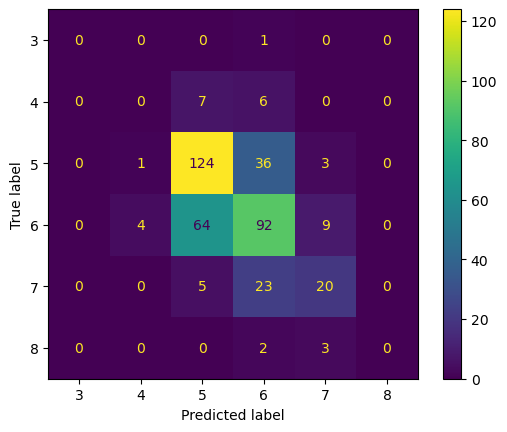

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
prediction = model.predict(x_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))
plot_confusion_matrix(model, x_test, y_test)
plt.show()

In [91]:
# data set이 충분하지 않아서 정확도가 떨어짐

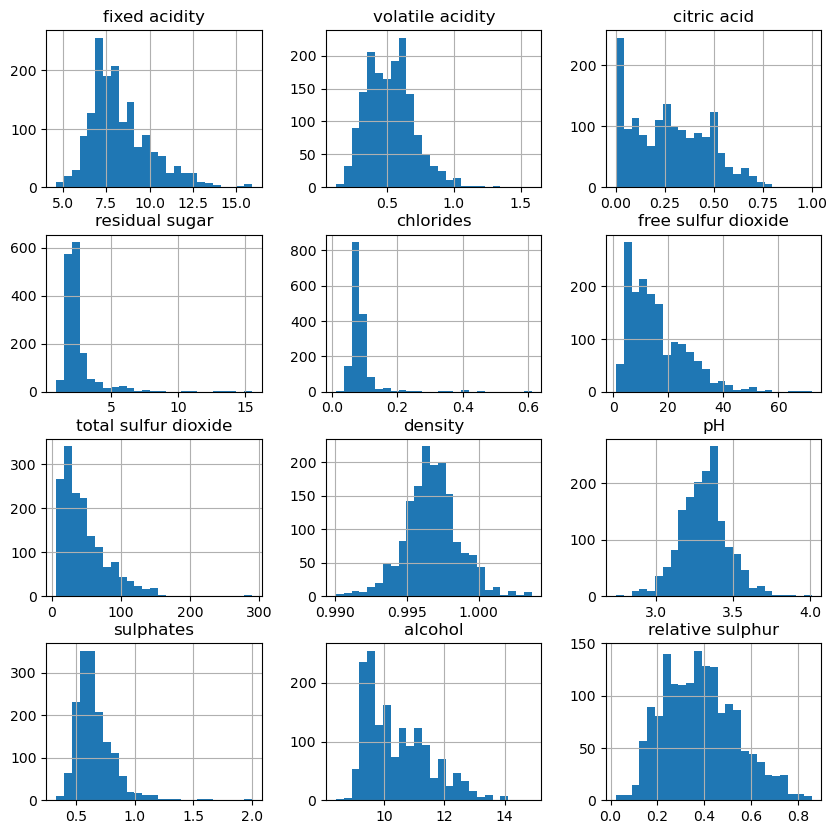

In [92]:
df.hist(bins=25, figsize=(10,10))
plt.show()

In [93]:
df_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,relative sulphur
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.323529
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.373134
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.277778
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0.283333
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.323529


In [94]:
df_raw = pd.read_csv(glob('./data/wine/*.csv')[0])

data = df_raw

df= df_raw 

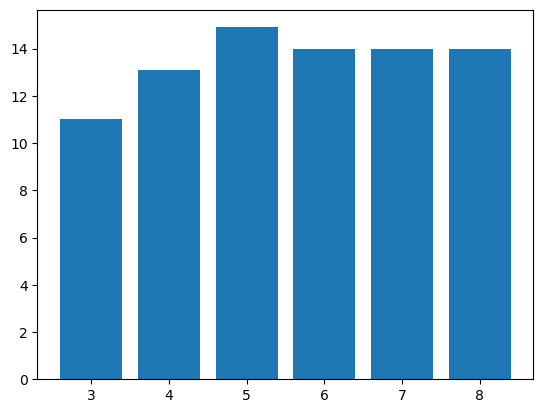

In [95]:
plt.bar(df_raw['quality'], df_raw['alcohol'])
plt.show()

In [96]:
# 다중 공선성 삭제(각 x값들 끼리의 상관도가 너무 높아서 생기는 문제)
# 변수 3개를 삭제 하지 않고, 변수간의 상관도 비교를 위해 모든 데이터로 작업

In [97]:
# 1) X, y 데이터 분리 테스트 데이터 생성

# x, y 데이터 분리
y=data.quality
X=data.drop(['quality'],axis=1)

# train, test로 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

# 각각의 훈련데이터(X,y)와 테스트데이터(X,y)간의 행의 갯수가 일치 하는지 확인 필수
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

In [98]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)                 # 훈련
X_scale = scaler.transform(X_train) # 데이터 변환

# 스케일링된 데이터 셋을 데이터프레임으로 만들고 범주형자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
X_train_scaled = pd.DataFrame(data = X_scale, index=X_train.index, columns=X_train.columns)

X_train_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
582,1.974181,-0.232603,1.114588,-0.246318,-0.110746,-1.060007,-0.962240,1.756955,-0.786419,-1.313194,-1.152577
626,0.281894,0.378026,0.090887,-0.246318,0.193294,-1.060007,-0.962240,1.105315,0.316104,-0.970646,-1.247037
1030,-0.710137,0.322515,-1.393481,-0.317176,0.051409,-0.669757,-0.992531,-1.023376,0.705229,-0.628099,1.019988
620,-0.009880,0.044956,-0.165039,0.603976,-0.252631,0.013182,1.976031,0.453675,-0.267585,-0.285551,-0.963659
490,0.573668,1.349482,-0.011484,0.178829,-0.212093,0.793683,0.279710,0.888102,-0.008168,0.056996,0.169854
...,...,...,...,...,...,...,...,...,...,...,...
1130,0.456958,0.378026,-1.393481,-0.458892,-0.617479,-1.060007,-1.113697,0.507978,-0.851273,-0.171369,-0.019065
1294,-0.068235,0.572317,-0.881630,-0.317176,-0.313439,0.891246,0.400875,-0.208826,-0.137876,0.513726,0.453232
860,-0.651782,0.489050,-1.086371,0.107971,-0.232362,-0.084381,1.158162,0.377650,1.288917,-0.685190,-0.869199
1459,-0.243299,-1.842444,0.397997,-0.600607,-0.698556,-0.864882,-0.962240,-1.186286,0.056687,0.799182,1.397825


In [99]:
# X_test
scaler = StandardScaler()
scaler.fit(X_test)                 # 훈련
X_scale = scaler.transform(X_test) # 데이터 변환

# 스케일링된 데이터 셋을 데이터프레임으로 만들고 범주형자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
X_test_scaled = pd.DataFrame(data = X_scale, index=X_test.index, columns=X_test.columns)

X_test_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,-0.345152,0.253817,-0.970865,-0.008816,0.751900,-0.172331,0.013122,0.201904,-0.456631,0.049360,-0.766201
124,-0.290169,-0.089083,-0.504041,-0.649943,-0.063099,0.460907,1.737090,-0.343916,0.512518,-1.143229,-0.858361
350,1.304319,0.882467,-0.244694,0.133657,0.573619,0.099057,-0.356299,1.839362,-0.198191,2.169519,-0.489719
682,0.094707,-0.317683,0.222131,-0.186906,-0.164974,1.455996,0.382544,0.648483,0.124859,-0.745700,-0.581879
1326,-0.894976,-0.317683,-0.140955,-0.578706,-0.190442,0.189519,-0.356299,-0.939355,0.512518,-0.348170,0.155406
...,...,...,...,...,...,...,...,...,...,...,...
1565,-0.894976,0.882467,-1.282081,-0.436234,-0.597942,0.913220,-0.110018,-0.894697,0.512518,1.109439,0.431888
327,1.084390,-0.431983,1.207648,1.415912,0.573619,-0.986495,-1.002787,0.648483,-0.198191,1.175694,0.984852
254,-0.675046,0.482417,-1.385820,-0.507470,-0.266849,0.008594,-0.356299,0.251524,1.029398,0.314380,-0.489719
322,-0.290169,0.596717,-1.126473,-0.151288,-0.139505,-0.896033,-0.848862,0.325954,-0.133581,-0.149405,-1.042682


In [100]:
# 회귀분석

ols_model=OLS(y_train,X_train_scaled)
results=ols_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.7912
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                       0.649
Time:                        14:07:56   Log-Likelihood:                         -3780.7
No. Observations:                1199   AIC:                                      7583.
Df Residuals:                    1188   BIC:                                      7639.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0375      0.443      0.085      0.933      -0.831       0.906
volatile acidity        -0.1817      0.221     -0.823      0.410      -0.615       0.251
citric acid             -0.0262      0.292     -0.089      0.929      -0.600       0.547
residual sugar           0.0125      0.215      0.058      0.954      -0.410       0.435
chlorides               -0.0866      0.202     -0.429      0.668      -0.483       0.310
free sulfur dioxide      0.0513      0.231      0.223      0.824      -0.401       0.504
total sulfur dioxide    -0.1206      0.244     -0.495      0.621      -0.599       0.358
density                 -0.0299      0.399     -0.075      0.940      -0.813       0.753
pH                      -0.0530      0.296     -0.179      0.858      -0.634       0.528
sulphates                0.1436      0.198      0.727      0.467      -0.244       0.531
alcohol                  0.3030      0.282      1.076      0.282      -0.249       0.855
==============================================================================
Omnibus:                       27.711   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.297
Skew:                          -0.189   Prob(JB):                     1.46e-10
Kurtosis:                       3.874   Cond. No.                         6.96
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
print(results.predict(X_test_scaled)[0:5])
print('------------------------------')
print(y_test.head())

803    -0.316216
124    -0.611223
350     0.013670
682    -0.213385
1326    0.087836
dtype: float64
------------------------------
803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64


In [102]:
sub = (results.predict(X_test_scaled) - round(y_test, 0))**2
np.sqrt(np.mean(sub)), np.mean(sub)

(5.696454050366331, 32.449588747934975)

In [103]:
X_train_scaled=add_constant(X_train_scaled)
X_test_scaled=add_constant(X_test_scaled)

ols_model=OLS(y_train,X_train_scaled)
results=ols_model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     59.35
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          6.09e-105
Time:                        14:07:56   Log-Likelihood:                -1191.7
No. Observations:                1199   AIC:                             2407.
Df Residuals:                    1187   BIC:                             2469.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6272      0.019    296.545      0.000       5.590       5.664
fixed acidity            0.0375      0.051      0.733      0.464      -0.063       0.138
volatile acidity        -0.1817      0.025     -7.131      0.000      -0.232      -0.132
citric acid             -0.0262      0.034     -0.775      0.438      -0.092       0.040
residual sugar           0.0125      0.025      0.503      0.615      -0.036       0.061
chlorides               -0.0866      0.023     -3.716      0.000      -0.132      -0.041
free sulfur dioxide      0.0513      0.027      1.929      0.054      -0.001       0.104
total sulfur dioxide    -0.1206      0.028     -4.287      0.000      -0.176      -0.065
density                 -0.0299      0.046     -0.649      0.517      -0.120       0.060
pH                      -0.0530      0.034     -1.552      0.121      -0.120       0.014
sulphates                0.1436      0.023      6.295      0.000       0.099       0.188
alcohol                  0.3030      0.033      9.320      0.000       0.239       0.367
==============================================================================
Omnibus:                       27.711   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.297
Skew:                          -0.189   Prob(JB):                     1.46e-10
Kurtosis:                       3.874   Cond. No.                         6.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
ols_pred=results.predict(X_test_scaled)
rounded_pred_ols=rounder(ols_pred)

# rmse는 낮을수록 좋음
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(rounded_pred_ols,y_test))}')

The RMSE of sklearn model: 0.85


In [109]:
lm=LinearRegression()
lm.fit(X_train_scaled,y_train)
print('Coefficients: ', np.round(lm.coef_,2))   # w값 의미
print('Intercept: ', np.round(lm.intercept_,2)) # b값 의미

X_train.shape

Coefficients:  [ 0.    0.04 -0.18 -0.03  0.01 -0.09  0.05 -0.12 -0.03 -0.05  0.14  0.3 ]
Intercept:  5.63


(1199, 11)

In [110]:
preds=lm.predict(X_test_scaled)
rounded_pred_lm=rounder(preds)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(y_test,rounded_pred_lm))}')

The RMSE of sklearn model: 0.85


In [111]:
# 로지스틱 분석
from sklearn.linear_model import LogisticRegression


model_lr = LogisticRegression()     # 옵션 없음
model_lr.fit(X_train_scaled, y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [112]:
from sklearn.metrics import classification_report

pred = model_lr.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.08      0.14        13
           5       0.61      0.76      0.68       164
           6       0.55      0.53      0.54       169
           7       0.40      0.25      0.31        48
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.43      0.27      0.28       400
weighted avg       0.56      0.57      0.55       400



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [113]:
np.sqrt(mean_squared_error(pred, y_test))

0.7053367989832943

In [114]:
# p-value가 높은 값(일반적으로 0.05이상)을 갖는 데이터 열에서 제거
# 필수는 아님.
xd = X.drop(['fixed acidity','citric acid','residual sugar'],axis=1)

In [115]:
Xd_train,Xd_test,y_train,y_test=train_test_split(xd,y,random_state=42)

In [116]:
Xd_train.shape, Xd_test.shape, y_train.shape, y_test.shape

((1199, 8), (400, 8), (1199,), (400,))

In [117]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xd_train)                 # 훈련
Xd_scale = scaler.transform(Xd_train) # 데이터 변환

# 스케일링된 데이터 셋을 데이터프레임으로 만들고 범주형자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
Xd_train_scaled = pd.DataFrame(data = Xd_scale, index=Xd_train.index, columns=Xd_train.columns)

Xd_train_scaled

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
582,-0.232603,-0.110746,-1.060007,-0.962240,1.756955,-0.786419,-1.313194,-1.152577
626,0.378026,0.193294,-1.060007,-0.962240,1.105315,0.316104,-0.970646,-1.247037
1030,0.322515,0.051409,-0.669757,-0.992531,-1.023376,0.705229,-0.628099,1.019988
620,0.044956,-0.252631,0.013182,1.976031,0.453675,-0.267585,-0.285551,-0.963659
490,1.349482,-0.212093,0.793683,0.279710,0.888102,-0.008168,0.056996,0.169854
...,...,...,...,...,...,...,...,...
1130,0.378026,-0.617479,-1.060007,-1.113697,0.507978,-0.851273,-0.171369,-0.019065
1294,0.572317,-0.313439,0.891246,0.400875,-0.208826,-0.137876,0.513726,0.453232
860,0.489050,-0.232362,-0.084381,1.158162,0.377650,1.288917,-0.685190,-0.869199
1459,-1.842444,-0.698556,-0.864882,-0.962240,-1.186286,0.056687,0.799182,1.397825


In [118]:
# X_test
scaler = StandardScaler()
scaler.fit(Xd_test)                 # 훈련
Xd_scale = scaler.transform(Xd_test) # 데이터 변환

# 스케일링된 데이터 셋을 데이터프레임으로 만들고 범주형자료만 별도로 띄어낸 X_cat과 합쳐서 한개의 데이터 프레임을 제작
Xd_test_scaled = pd.DataFrame(data = Xd_scale, index=Xd_test.index, columns=Xd_test.columns)

Xd_test_scaled

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,0.253817,0.751900,-0.172331,0.013122,0.201904,-0.456631,0.049360,-0.766201
124,-0.089083,-0.063099,0.460907,1.737090,-0.343916,0.512518,-1.143229,-0.858361
350,0.882467,0.573619,0.099057,-0.356299,1.839362,-0.198191,2.169519,-0.489719
682,-0.317683,-0.164974,1.455996,0.382544,0.648483,0.124859,-0.745700,-0.581879
1326,-0.317683,-0.190442,0.189519,-0.356299,-0.939355,0.512518,-0.348170,0.155406
...,...,...,...,...,...,...,...,...
1565,0.882467,-0.597942,0.913220,-0.110018,-0.894697,0.512518,1.109439,0.431888
327,-0.431983,0.573619,-0.986495,-1.002787,0.648483,-0.198191,1.175694,0.984852
254,0.482417,-0.266849,0.008594,-0.356299,0.251524,1.029398,0.314380,-0.489719
322,0.596717,-0.139505,-0.896033,-0.848862,0.325954,-0.133581,-0.149405,-1.042682


In [119]:
ols_model=OLS(y_train,Xd_train)
results=ols_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.110e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        14:08:55   Log-Likelihood:                         -1192.4
No. Observations:                1199   AIC:                                      2401.
Df Residuals:                    1191   BIC:                                      2442.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -0.9593      0.117     -8.200      0.000      -1.189      -0.730
chlorides               -1.8737      0.445     -4.212      0.000      -2.746      -1.001
free sulfur dioxide      0.0056      0.003      2.200      0.028       0.001       0.011
total sulfur dioxide    -0.0039      0.001     -4.815      0.000      -0.005      -0.002
density                  4.0671      0.467      8.706      0.000       3.151       4.984
pH                      -0.3980      0.137     -2.913      0.004      -0.666      -0.130
sulphates                0.7895      0.125      6.294      0.000       0.543       1.036
alcohol                  0.3012      0.020     15.222      0.000       0.262       0.340
==============================================================================
Omnibus:                       26.495   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.808
Skew:                          -0.183   Prob(JB):                     5.06e-10
Kurtosis:                       3.850   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
print(results.predict(Xd_test_scaled)[0:5])
print('------------------------------')
print(y_test.head())

803    -0.842276
124    -2.564214
350     7.205569
682     2.444272
1326   -3.588433
dtype: float64
------------------------------
803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64


In [121]:
sub = (results.predict(Xd_test_scaled) - round(y_test, 0))**2
np.sqrt(np.mean(sub)), np.mean(sub)

(7.108158546521062, 50.52591792248041)

In [122]:
lm=LinearRegression()
lm.fit(Xd_train,y_train)
print('Coefficients: ', np.round(lm.coef_,2))   # w값 의미
print('Intercept: ', np.round(lm.intercept_,2)) # b값 의미

X_train.shape

Coefficients:  [-0.96 -1.89  0.01 -0.   -4.41 -0.42  0.8   0.29]
Intercept:  8.6


(1199, 11)

In [123]:
preds=lm.predict(Xd_test)
rounded_pred_lm=rounder(preds)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(y_test,rounded_pred_lm))}')

The RMSE of sklearn model: 0.8276472678623424


In [124]:
# 로지스틱 분석
from sklearn.linear_model import LogisticRegression


model_lr = LogisticRegression()     # 옵션 없음
model_lr.fit(X_train_scaled, y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [125]:
from sklearn.metrics import classification_report

pred = model_lr.predict(X_test_scaled)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.08      0.14        13
           5       0.61      0.76      0.68       164
           6       0.55      0.53      0.54       169
           7       0.40      0.25      0.31        48
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.43      0.27      0.28       400
weighted avg       0.56      0.57      0.55       400



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [126]:
np.sqrt(mean_squared_error(pred, y_test))

0.7053367989832943

In [127]:


def classReport(x, y, pred):
    
    

In [128]:
## KNN

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 5)
model.fit(X_train, y_train)
print(f'---Avearage K neightbors precision-- {model.score(X_test, y_test)}\n')

classReport(X_test, y_test)

---Avearage K neightbors precision-- 0.4675

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.49      0.64      0.56       164
           6       0.47      0.44      0.45       169
           7       0.30      0.15      0.20        48
           8       0.00      0.00      0.00         5

    accuracy                           0.47       400
   macro avg       0.21      0.20      0.20       400
weighted avg       0.44      0.47      0.44       400

[[  0   0   0   1   0   0]
 [  0   0   7   6   0   0]
 [  0   1 124  36   3   0]
 [  0   4  64  92   9   0]
 [  0   0   5  23  20   0]
 [  0   0   0   2   3   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [131]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 5)
model.fit(X_train_scaled, y_train)
print(f'---Avearage K neightbors precision-- {model.score(X_test_scaled, y_test)}\n')

classReport(X_test_scaled, y_test)

---Avearage K neightbors precision-- 0.5875

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.08      0.11        13
           5       0.64      0.70      0.67       164
           6       0.56      0.59      0.58       169
           7       0.54      0.40      0.46        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.32      0.29      0.30       400
weighted avg       0.57      0.59      0.58       400

[[  0   0   0   1   0   0]
 [  0   1   5   7   0   0]
 [  1   2 115  44   2   0]
 [  1   2  54 100  12   0]
 [  0   0   5  23  19   1]
 [  0   0   1   2   2   0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.08      0.11        13
           5       0.64      0.70      0.67       164
           6       0.56      0.59      0.58       169
           7       0.54      0.40      0.46        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.32      0.29      0.30       400
weighted avg       0.57      0.59      0.58       400

[[  0   0   0   1   0   0]
 [  0   1   5   7   0   0]
 [  1   2 115  44   2   0]
 [  1   2  54 100  12   0]
 [  0   0   5  23  19   1]
 [  0   0   1   2   2   0]]


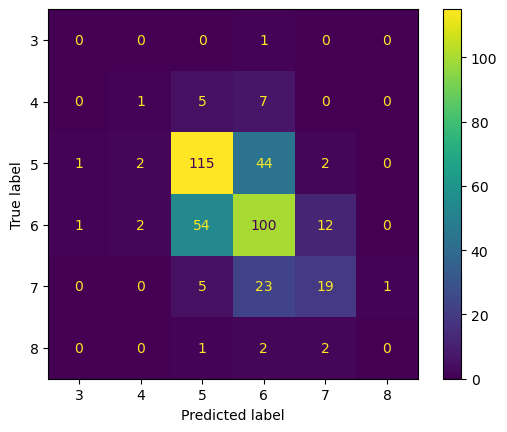

In [130]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
prediction = model.predict(X_test_scaled)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))
plot_confusion_matrix(model, X_test_scaled, y_test)
plt.show()